# ANAMOLY DETECTION ON HEALTHCARE DATA
### Name  : Aditya Sahani & Shikhar Dave
#### Dataset : https://www.kaggle.com/datasets/tamilsel/healthcare-providers-data/code
#### Technology and Models Used : Isolation Forest, LocalOutlierFactor and Autoencoders
#### Data has around 3 % anamoly i.e. around 3000

In [25]:
## Importing all the necessaries libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("https://raw.githubusercontent.com/sahaniaditya/healthcare_anamoly_detection/main/Healthcare%20Providers.csv")

In [27]:
df.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [28]:
df.info() ## getting the info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [29]:
columns = [ "Number of Services", "Number of Medicare Beneficiaries","Number of Distinct Medicare Beneficiary/Per Day Services","Average Medicare Allowed Amount","Average Submitted Charge Amount","Average Medicare Payment Amount","Average Medicare Standardized Amount"]

In [30]:
df = df[columns]  ## dropping the unnecessary columns

In [31]:
df ##  refined dataset

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,175,175,175,123.73,548.8,118.83,135.31525714
2,32,13,32,90.65,155,64.4396875,60.5959375
3,20,18,20,3.5,5,3.43,3.43
4,33,24,31,26.52,40,19.539393939,19.057575758
...,...,...,...,...,...,...,...
99995,20,20,20,85.3725,214,60.7255,62.2485
99996,136,107,136,61.27,144.05147059,30.006176471,37.040220588
99997,11,11,11,17.98,109.54545455,14.09,14.62
99998,12,12,12,30.54,65,29.93,25.32


### Data Preprocessing

In [32]:
df.isnull().sum()  ## checking for null values

Number of Services                                          0
Number of Medicare Beneficiaries                            0
Number of Distinct Medicare Beneficiary/Per Day Services    0
Average Medicare Allowed Amount                             0
Average Submitted Charge Amount                             0
Average Medicare Payment Amount                             0
Average Medicare Standardized Amount                        0
dtype: int64

In [33]:
df.dropna(how="any", inplace=True)  ## removing the null rows

<ipython-input-33-4bcc0e0bbaae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(how="any", inplace=True)  ## removing the null rows


In [34]:
df.isnull().sum()

Number of Services                                          0
Number of Medicare Beneficiaries                            0
Number of Distinct Medicare Beneficiary/Per Day Services    0
Average Medicare Allowed Amount                             0
Average Submitted Charge Amount                             0
Average Medicare Payment Amount                             0
Average Medicare Standardized Amount                        0
dtype: int64

In [35]:
df.duplicated().sum()  ## checking for duplicated rows

230

In [36]:
df = df.drop_duplicates()

In [37]:
df.duplicated().sum()  ## duplicate rows removed successfully

0

In [38]:
df.head() ## new_dataset

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,175,175,175,123.73,548.8,118.83,135.31525714
2,32,13,32,90.65,155,64.4396875,60.5959375
3,20,18,20,3.5,5,3.43,3.43
4,33,24,31,26.52,40,19.539393939,19.057575758


In [39]:
## function to remove commas from  the numerical dataset
def remove_comma(x):
   st = str(x)
   val = ""
   for i in st:
    if(i != ','):
      val = val + i

   return float(val)

In [40]:
col_list = df.columns

In [41]:
col_list

Index(['Number of Services', 'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount'],
      dtype='object')

In [42]:
for col in col_list:
  df[col] = df[col].apply(remove_comma)

<ipython-input-42-2da5d9c74175>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(remove_comma)


In [43]:
df.head()  ## dataset after removing commas

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576


# ISOLATION FOREST

In [44]:
## importing StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
std = StandardScaler()
new_df = std.fit_transform(df)

In [45]:
new_df

array([[-0.08540599, -0.05938359, -0.07027278, ..., -0.0470639 ,
         0.3991462 ,  0.41335085],
       [-0.0261117 ,  0.07654416,  0.01985582, ...,  0.1819339 ,
         0.20691402,  0.2855445 ],
       [-0.0834028 , -0.06928561, -0.0672279 , ..., -0.1882773 ,
        -0.06513811, -0.08757971],
       ...,
       [-0.09181618, -0.07108598, -0.08001642, ..., -0.23100909,
        -0.31697964, -0.31716873],
       [-0.09141555, -0.07018579, -0.07940744, ..., -0.27288625,
        -0.23775035, -0.26373638],
       [ 0.13975206, -0.01257403,  0.27075437, ..., -0.28993254,
        -0.23871633, -0.26077942]])

In [46]:
from sklearn.ensemble import IsolationForest

In [283]:
clf = IsolationForest(max_samples = 2000,random_state=42)

In [284]:
X = clf.fit(new_df)

In [285]:
y_pred = clf.predict(new_df)

In [292]:
## function to count the anamoly
isolation_anamoly = 0
def count_anamoly(x):
  anamoly = 0
  points = 0
  for i in x:
    if i == -1:
     anamoly = anamoly + 1
    else:
      points = points + 1

  print("Anamoly : ", anamoly)
  print("Normal : ", points)
  return anamoly

In [293]:
isolation_anamoly = count_anamoly(y_pred)

Anamoly :  2682
Normal :  97088


### Exploratory Data Analysis

In [52]:
## taking a small dataset to perform EDA
df1 = df.iloc[100 : 1100]

In [53]:
df1

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
100,15.0,13.0,15.0,49.480000,120.000000,33.618000,29.995333
101,89.0,87.0,89.0,172.677191,182.652022,128.851910,136.278427
102,212.0,33.0,212.0,29.730000,42.000000,19.476085,19.194009
103,145.0,144.0,145.0,223.485310,400.000000,166.448069,172.422414
104,110.0,110.0,110.0,72.370000,143.000000,52.875000,55.835455
...,...,...,...,...,...,...,...
1095,849.0,523.0,849.0,22.360000,91.500000,21.868292,21.910000
1096,12.0,12.0,12.0,326.890000,1225.000000,153.871667,298.998333
1097,1778.0,355.0,1776.0,109.921024,566.366704,85.076406,86.267379
1098,18.0,15.0,18.0,467.600000,1000.000000,362.168333,297.506111


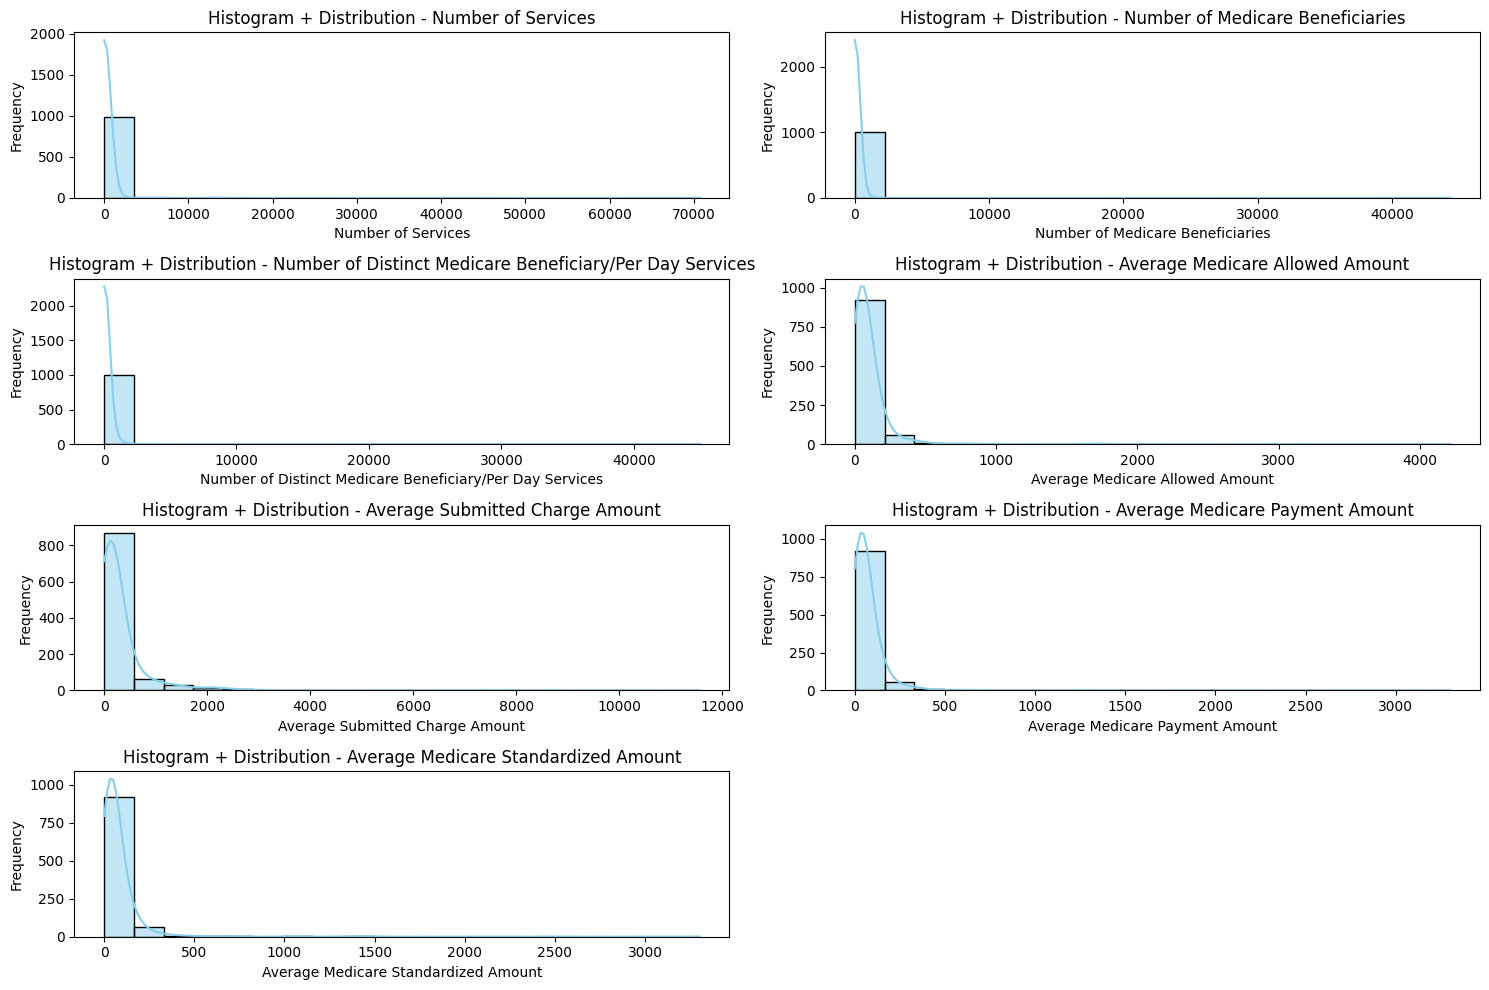

In [54]:
## Visualizing the histogram and density plots for the outlier intuition
## Bins having less height are assumed to be outlier

import seaborn as sns
import matplotlib.pyplot as plt

# Create histograms for each feature in df1 with zoomed-in views
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed


num_features = len(df1.columns)
num_rows = (num_features + 1) // 2
num_cols = 2

# Loop through each feature and create a histogram in a separate subplot
for idx, column in enumerate(df1.columns):
    plt.subplot(num_rows, num_cols, idx + 1)
    sns.histplot(df1[column], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram + Distribution - {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()

# Show the plots
plt.show()


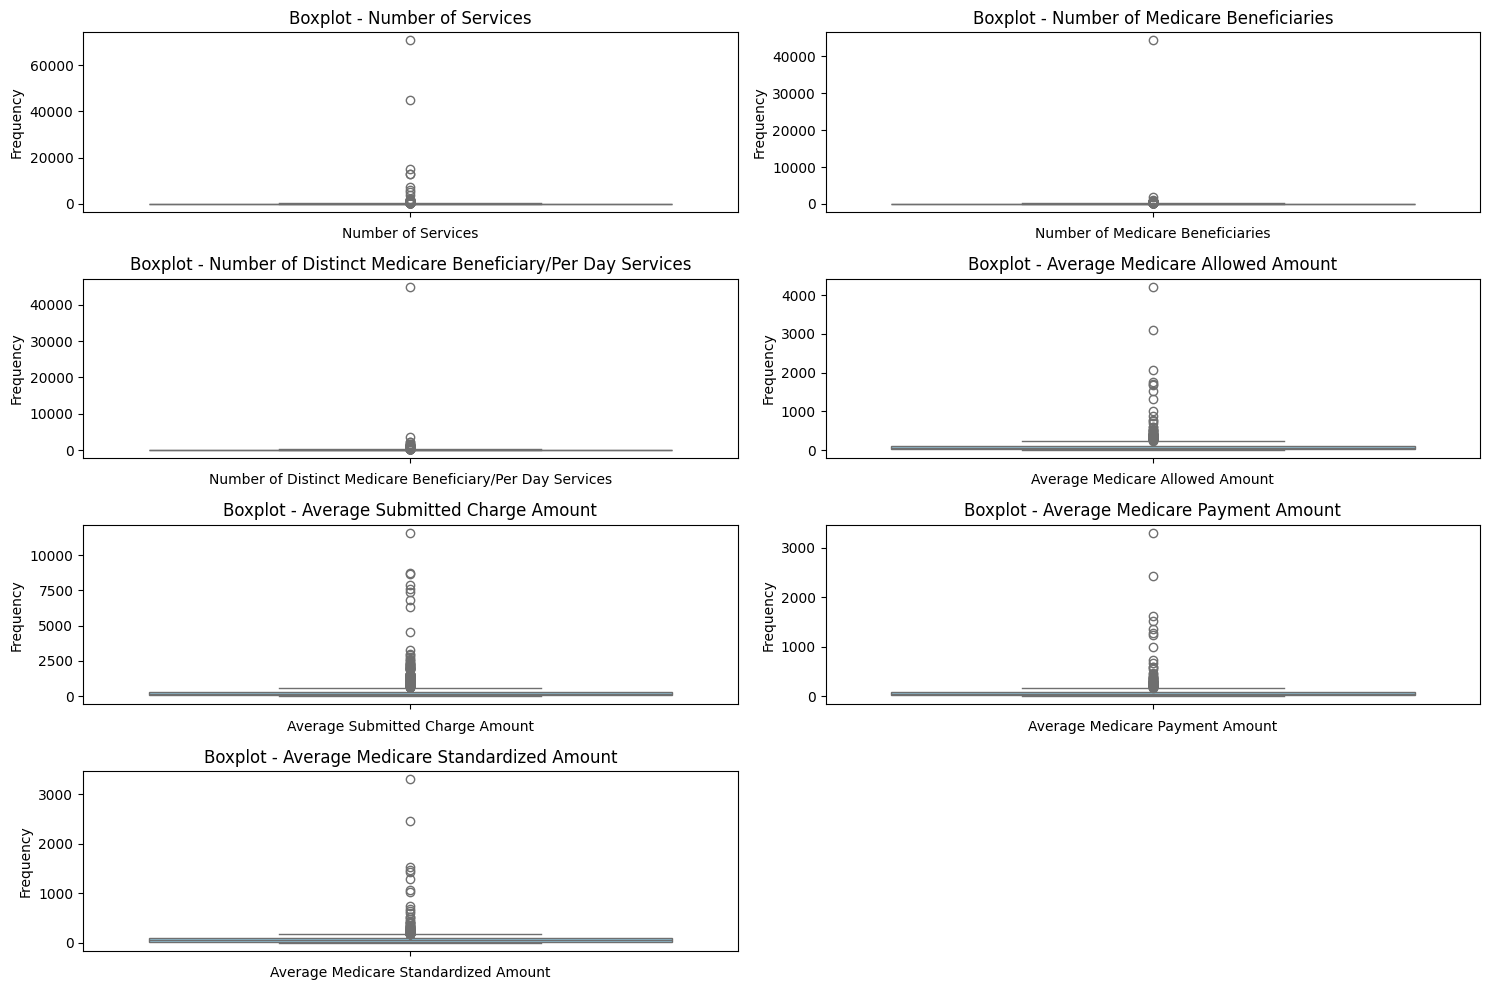

In [55]:
## Visualizing the histogram and density plots for the outlier intuition
## Bins having less height are assumed to be outlier

import seaborn as sns
import matplotlib.pyplot as plt

# Create histograms for each feature in df1 with zoomed-in views
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed


num_features = len(df1.columns)
num_rows = (num_features + 1) // 2
num_cols = 2

# Loop through each feature and create a histogram in a separate subplot
for idx, column in enumerate(df1.columns):
    plt.subplot(num_rows, num_cols, idx + 1)
    sns.boxplot(df1[column] , color='skyblue')
    plt.title(f'Boxplot - {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()

# Show the plots
plt.show()

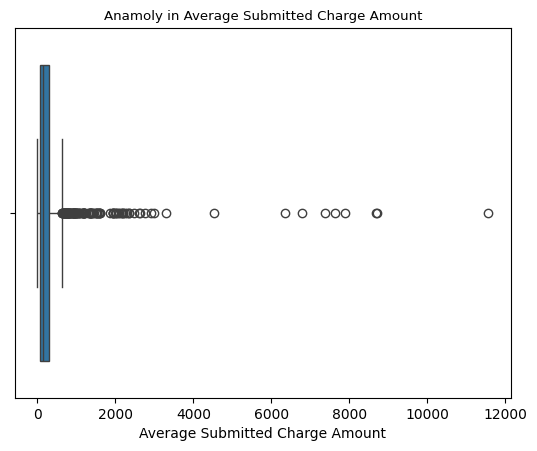

In [56]:
sns.boxplot(df1,x = "Average Submitted Charge Amount")
sns.set_palette("Set2")
sns.set_style("darkgrid")
sns.set_context("paper")
plt.title("Anamoly in Average Submitted Charge Amount")
plt.show()

<ipython-input-59-ea4201ce7118>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(new_df[: , 3], new_df[: , 4], cmap='viridis', s=10, alpha=0.8)


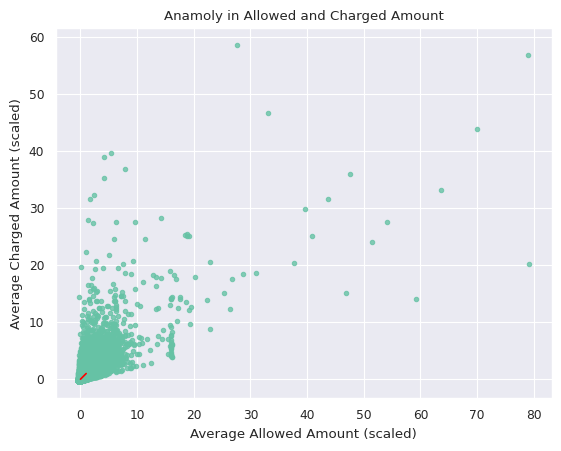

In [59]:
# Scatter plot of two features
plt.scatter(new_df[: , 3], new_df[: , 4], cmap='viridis', s=10, alpha=0.8)
plt.plot([0,1],[0,1], color="red")
plt.title('Anamoly in Allowed and Charged Amount')
plt.xlabel('Average Allowed Amount (scaled)')
plt.ylabel('Average Charged Amount (scaled)')
plt.show()
## line shows the normal behaviour. Points should be around the line . If it's not, there might be an anamoly

<ipython-input-60-c5e6c4f6fa54>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(new_df[: , 3], new_df[: , 5], cmap='viridis', s=10, alpha=0.8)


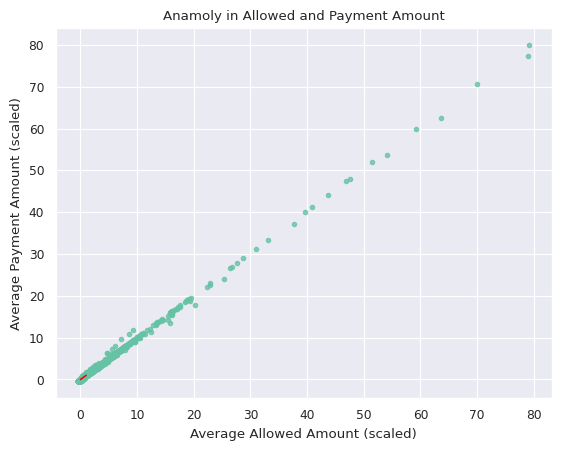

In [60]:
# Scatter plot of two features
plt.scatter(new_df[: , 3], new_df[: , 5], cmap='viridis', s=10, alpha=0.8)
plt.plot([0,1],[0,1], color="red")
plt.title('Anamoly in Allowed and Payment Amount')
plt.xlabel('Average Allowed Amount (scaled)')
plt.ylabel('Average Payment Amount (scaled)')
plt.show()
## line shows the normal behaviour. Points should be around the line . If it's not, there might be an anamoly

<ipython-input-61-bb4fa152d160>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(new_df[:, 0], new_df[:, 1], cmap='viridis', s=10, alpha=0.8)


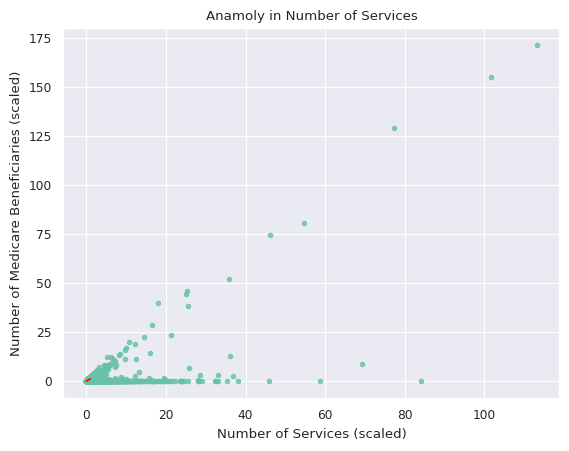

In [61]:
# Scatter plot of two features
plt.scatter(new_df[:, 0], new_df[:, 1], cmap='viridis', s=10, alpha=0.8)
plt.plot([0,1],[0,1], color="red")
plt.title('Anamoly in Number of Services')
plt.xlabel('Number of Services (scaled)')
plt.ylabel('Number of Medicare Beneficiaries (scaled)')
plt.show()
## line shows the normal behaviour. Points should be around the line . If it's not, there might be an anamoly

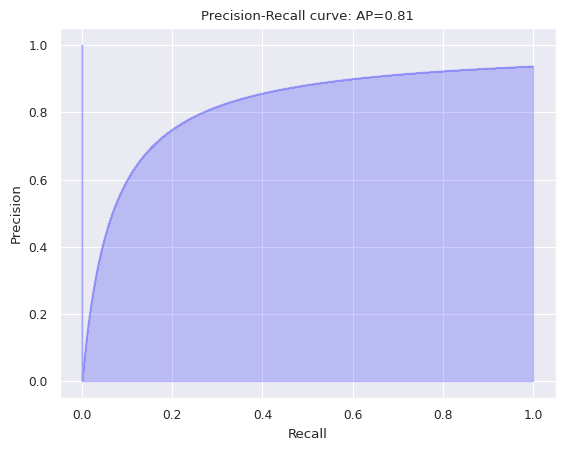

In [62]:
from sklearn.metrics import precision_recall_curve, average_precision_score
# Assuming 'y_scores' is the anomaly scores from the isolation forest
# If y_pred contains only -1 and 1, convert it to probability scores for the anomaly class
y_scores = clf.decision_function(new_df)

precision, recall, _ = precision_recall_curve(y_pred, -y_scores)
average_precision = average_precision_score(y_pred, -y_scores)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()



# Local Outlier Factor

In [63]:
from sklearn.neighbors import LocalOutlierFactor

In [64]:
## neighbours vs anamoly relationship
# 1000 - 4735
# 2000 - 7404
# 2500 - 8290
# 2700 - 8628
# 2900 - 8968
# 3100 - 9275

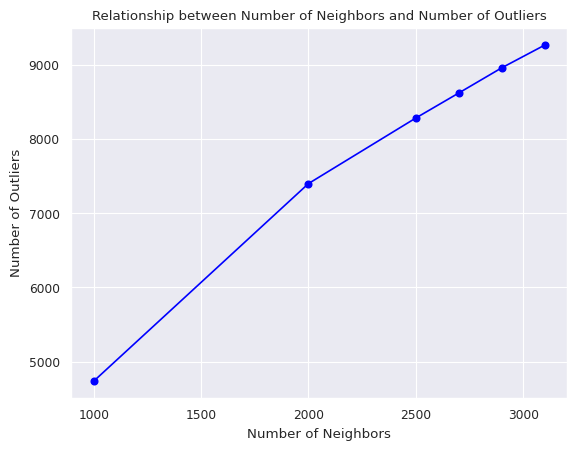

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have data for number of neighbors and number of outliers
neighbors = [1000,2000,2500,2700,2900,3100]
outliers = [4735,7404,8290,8628,8968,9275]

# Plotting the relationship between neighbors and outliers
plt.plot(neighbors, outliers, marker='o', linestyle='-', color='b')
plt.title('Relationship between Number of Neighbors and Number of Outliers')
plt.xlabel('Number of Neighbors')
plt.ylabel('Number of Outliers')
plt.grid(True)
plt.show()


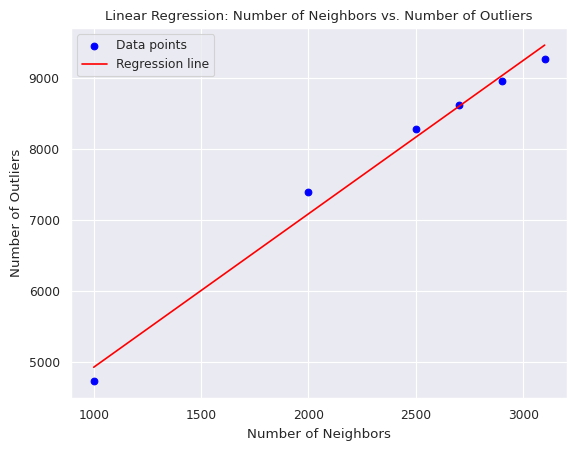

Regression Equation: y = 2.16 * x + 2770.72


In [66]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Assuming you have data for number of neighbors and number of outliers
neighbors = np.array([1000,2000,2500,2700,2900,3100])  # Replace with your actual data
outliers = np.array([4735,7404,8290,8628,8968,9275])      # Replace with your actual data

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(neighbors, outliers)

# Plot the data and regression line
plt.scatter(neighbors, outliers, color='blue', label='Data points')
plt.plot(neighbors, slope * neighbors + intercept, color='red', label='Regression line')
plt.title('Linear Regression: Number of Neighbors vs. Number of Outliers')
plt.xlabel('Number of Neighbors')
plt.ylabel('Number of Outliers')
plt.legend()
plt.show()

# Print the regression equation
print(f"Regression Equation: y = {slope:.2f} * x + {intercept:.2f}")


In [269]:
lof = LocalOutlierFactor(contamination = 'auto', n_neighbors=500)

In [270]:
y_pred1 = lof.fit_predict(new_df)

In [271]:
num_anomalies = len(y_pred1[y_pred1 == -1])

In [272]:
print("Number of Anamolies using LOF : ",num_anomalies)

Number of Anamolies using LOF :  3707


In [71]:
lof_scores = lof.negative_outlier_factor_

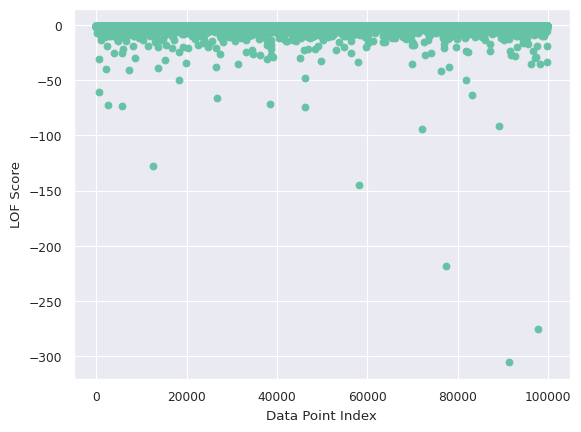

In [72]:
import matplotlib.pyplot as plt
# Plot LOF scores
plt.scatter(range(len(lof_scores)), lof_scores)
plt.xlabel('Data Point Index')
plt.ylabel('LOF Score')
plt.show()


# AUTOENCODER

In [ ]:
## applying autoencoders to check for anamoly

In [73]:
import tensorflow
from sklearn.preprocessing import StandardScaler

In [74]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError, MeanSquaredError

In [193]:
## scaling the data using MinMax Scaling
minmaxscaler = StandardScaler()
minmaxscaler.fit(df)
x_train_scaled = minmaxscaler.transform(df)

In [253]:
# create a model by subclassing Model class in tensorflow
class AutoEncoder(Model):
  def __init__(self, output_units, code_size = 8):
    super().__init__()
    self.encoder = Sequential([
      Dense(256, activation='relu'),
      Dropout(0.1),
      Dense(128, activation='relu'),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(16, activation='relu'),
      BatchNormalization(),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(128, activation='relu'),
      Dropout(0.1),
      Dense(256, activation='relu'),
      Dropout(0.3),
      Dense(output_units, activation = 'sigmoid')
    ])

  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded


In [254]:

model = AutoEncoder(output_units = x_train_scaled.shape[1])
# configurations of model
model.compile(loss = 'msle', metrics = ['mse'], optimizer = 'adam')

history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs = 20,
    batch_size = x_train_scaled.shape[0]
)

Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: 0.1647 - mse: 1.2549
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 0.1628 - mse: 1.2482
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 0.1608 - mse: 1.2450
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 0.1579 - mse: 1.2378
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: 0.1539 - mse: 1.2289
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 0.1482 - mse: 1.2169
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 0.1411 - mse: 1.2021
Epoch 8/20
1/1 [==============================] - 2s 2s/step - loss: 0.1320 - mse: 1.1834
Epoch 9/20
1/1 [==============================] - 2s 2s/step - loss: 0.1220 - mse: 1.1626
Epoch 10/20
1/1 [==============================] - 2s 2s/step - loss: 0.1121 - mse: 1.1441
Epoch 11/20
1/1 [==============================] - 3s 3s/step - loss: 0.1018 - mse: 1.1229
Epoch 12

In [257]:
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  # provides losses of individual instances
  reconstruction_errors = tensorflow.keras.losses.msle(reconstructions, x_train_scaled)
  # threshold for anomaly scores
  threshold = np.mean(reconstruction_errors.numpy()) + np.std(reconstruction_errors.numpy())
  return threshold

def get_predictions(model, x_train_scaled, threshold):
  predictions = model.predict(x_train_scaled)
  # provides losses of individual instances
  errors = tensorflow.keras.losses.msle(predictions, x_train_scaled)
  # 0 = anomaly, 1 = normal
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
  return preds

threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")
predictions = get_predictions(model, x_train_scaled, threshold)

3118/3118 [==============================] - 4s 1ms/step
Threshold: 0.27871311941282384
3118/3118 [==============================] - 4s 1ms/step


In [258]:
count = 0
for i in predictions:
  if i == 0:
    count = count + 1

In [288]:
print("Number of Anamolies : ", count)

Number of Anamolies :  2505


### Final Observation

<Axes: >

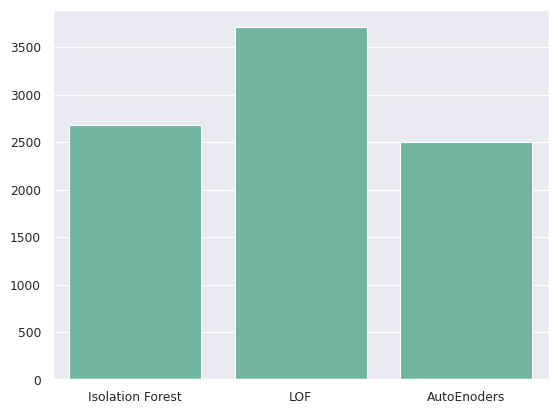

In [295]:
## plot to compare the anamoly for different plots
anamolies = [isolation_anamoly, num_anomalies, count]
algo = ["Isolation Forest", "LOF" ,"AutoEnoders"]
sns.barplot(x = algo, y = anamolies)

In [ ]:
## All the above algorithms are very close to 3% i.e. around 3000 anamoly points

# Completed